**LABORATORIO FINAL**

*PARTE 1*

PRESENTADO POR:

*Laura Sofía Mosquera Gruezo*

*María Celeste Isaza Vergara*


1. IMPLEMENTAR EL REGRESOR LINEAL DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN.

In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
# Base de datos.
df = pd.read_csv("bmi.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


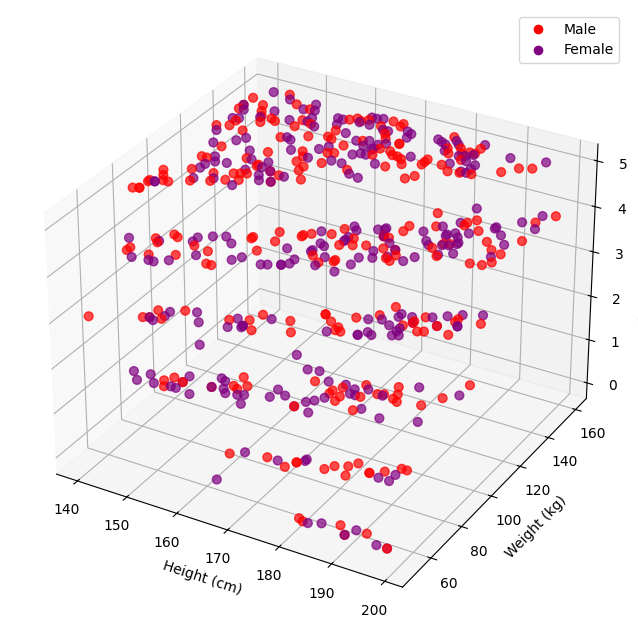

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

# Organización con colores.
colors = df["Gender"].apply(lambda g: "RED" if g=="Male" else "PURPLE")

# Scatter plot 3D.
ax.scatter(df["Height"], df["Weight"], df["Index"],
           c=colors, s=40, alpha=0.7)

# Etiquetas.
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("Index (BMI category)")

# Leyenda.
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Male',
           markerfacecolor='RED', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Female',
           markerfacecolor='PURPLE', markersize=8)
]
ax.legend(handles=legend_elements, loc='best')

plt.show()


In [4]:
# Conversión de "Gender" a valores numéricos.
df["New_Gender"] = df["Gender"].map({"Male":1, "Female":0})
df.head()

,Gender,Height,Weight,Index,New_Gender
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [5]:
# Variables independientes y dependientes.
X = df[["Height", "Weight", "New_Gender"]] # Variables independientes.
y = df["Index"] # Variable dependiente.

In [6]:
# División de datos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Total registros:", len(df))
print("Entrenamiento:", len(X_train))
print("Prueba:", len(X_test))

Total registros: 500
Entrenamiento: 400
Prueba: 100


In [7]:
def training(X, y, epochs, lr=0.00001):
    m, n = X.shape
    weights = np.zeros((n,1))   # Inicializar pesos
    bias = 0                    # Inicializar bias
    y = y.to_numpy().reshape(m,1)
    losses = []

    for epoch in range(epochs):
        # Predicción
        y_hat = np.dot(X, weights) + bias
        # Costo (MSE)
        loss = np.mean((y_hat - y)**2)
        losses.append(loss)

        # Gradientes
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Actualización
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, losses

In [8]:
# Predicción.
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

In [9]:
# Entrenamiento del modelo.
epochs = 500
lr = 0.00001
weights, bias, losses = training(X, y, epochs, lr)

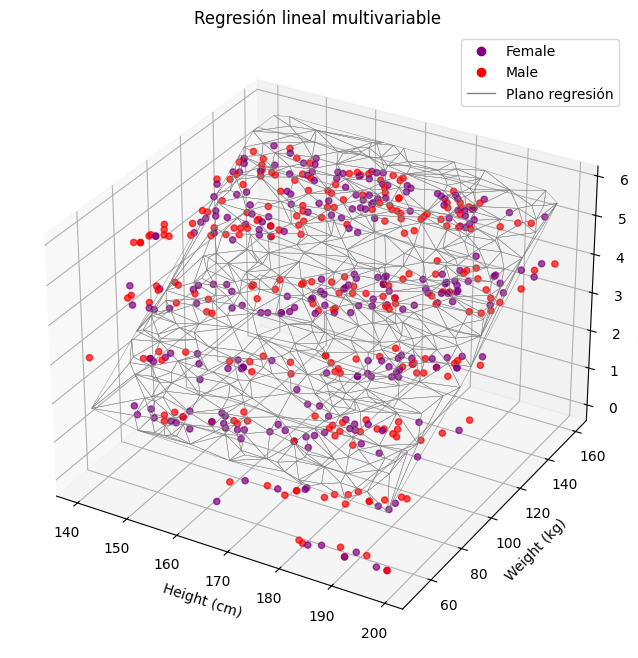

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

# Organización con colores
colors = df["Gender"].apply(lambda g: "RED" if g=="Male" else "PURPLE")

ax.scatter(df["Height"], df["Weight"], df["Index"],
           c=colors, s=20, alpha=0.7, depthshade=True)

# Plano de regresión lineal
Z_pred = predict(X, weights, bias)
ax.plot_trisurf(X["Height"].values, X["Weight"].values, Z_pred[:,0],
                            color=(0,0,0,0), edgecolor="gray", linewidth=0.3)

# Etiquetas
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("Index (BMI category)")
ax.set_title("Regresión lineal multivariable")

# Leyenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female',
           markerfacecolor='PURPLE', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Male',
           markerfacecolor='RED', markersize=8),
    Line2D([0], [0], color='gray', lw=1, label='Plano regresión')
]
ax.legend(handles=legend_elements, loc='best')

plt.show()

2. REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS (DEBERIAN DISMINUIR A MEDIDA DE QUE LAS EPOCHS AUMENTA).

In [11]:
print(f"{'Época':>6} | {'Bias':>10} | {'Costo (MSE)':>12} | {'w':>10}")
# Reporte por época
for i in range(len(losses)):
    epoch = i + 1
    bias_str = f"{bias:.6f}"
    cost_str = f"{losses[i]:.6f}"
    w = f"{weights[0,0]:.6f}"
    print(f"{epoch:6d} | {bias_str:>10} | {cost_str:>12} | {w:>10} |")


 Época |       Bias |  Costo (MSE) |          w
     1 |   0.000277 |    15.880000 |  -0.002190 |
     2 |   0.000277 |     6.616536 |  -0.002190 |
     3 |   0.000277 |     3.338897 |  -0.002190 |
     4 |   0.000277 |     2.172921 |  -0.002190 |
     5 |   0.000277 |     1.751994 |  -0.002190 |
     6 |   0.000277 |     1.594042 |  -0.002190 |
     7 |   0.000277 |     1.529009 |  -0.002190 |
     8 |   0.000277 |     1.496907 |  -0.002190 |
     9 |   0.000277 |     1.476572 |  -0.002190 |
    10 |   0.000277 |     1.460535 |  -0.002190 |
    11 |   0.000277 |     1.446161 |  -0.002190 |
    12 |   0.000277 |     1.432516 |  -0.002190 |
    13 |   0.000277 |     1.419269 |  -0.002190 |
    14 |   0.000277 |     1.406302 |  -0.002190 |
    15 |   0.000277 |     1.393569 |  -0.002190 |
    16 |   0.000277 |     1.381053 |  -0.002190 |
    17 |   0.000277 |     1.368746 |  -0.002190 |
    18 |   0.000277 |     1.356642 |  -0.002190 |
    19 |   0.000277 |     1.344737 |  -0.002190 |
  

3. GRAFIQUE LOS COSTOS VS LAS EPOCHS.

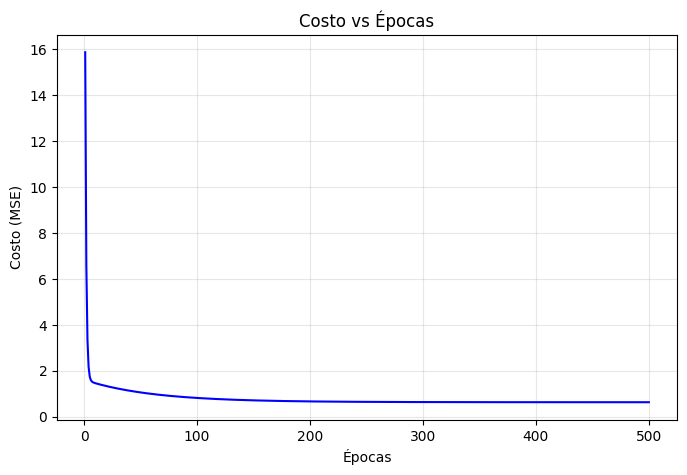

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), losses, color="BLUE")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.title(f"Costo vs Épocas")
plt.grid(alpha=0.3)
plt.show()

4. PRESENTE LAS METRICAS DE REGRESION CON SU RESPECTIVA INTERPRETACION (R2, MSE, MAE...Y LAS QUE ESTAN ESPECIFICADAS EN EL NOTEBOOK).


In [13]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# Predicciones sobre todo el dataset
y_pred = predict(X, weights, bias).reshape(-1)

# Métricas
r2 = r2_score(y, y_pred)  # Coeficiente de determinación
mae = mean_absolute_error(y, y_pred)  # Error absoluto medio
pearson_corr = np.corrcoef(y, y_pred)[0, 1]  # Correlación de Pearson
# Filtrar valores donde y != 0
mask = y != 0
mape = np.mean(np.abs((y[mask] - y_pred[mask]) / y[mask])) * 100


# Reporte
print(f"R²: {r2:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Pearson Correlation Coefficient: {pearson_corr:.6f}")
print(f"MAPE (%): {mape:.2f}")


R²: 0.654878
MAE: 0.627709
Pearson Correlation Coefficient: 0.816422
MAPE (%): 18.78


5. SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA PREDICCION CON EL ALGORITMO ENTRENADO.


In [14]:
# Simulación de nuevo paciente.
new_patient = pd.DataFrame({
    "Height": [165],
    "Weight": [60],
    "New_Gender": [0] # 0=female, 1=male.               
})
# Predicción del índice BMI para el nuevo paciente. 
predicted_index = predict(new_patient, weights, bias)
print("Predicted BMI Index for new patient:", predicted_index[0,0])                                    

Predicted BMI Index for new patient: 1.9424452183385892
